In [ ]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import csv

Reading the data from the respective CSV files. (Change the directory paths as needed).

In [ ]:
from google.colab import files

In [ ]:
def load_csv(path):
    with open(path, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
    return data

train_data = load_csv("train.csv")
test_data = load_csv("test.csv")

print("Train data: ", len(train_data), len(train_data[0]))
print("Test data: ", len(test_data), len(test_data[0]))

train_df = pd.DataFrame(train_data[1:], columns=train_data[0])
test_df = pd.DataFrame(test_data[1:], columns=test_data[0])

Train data:  92229 3
Test data:  5111 2


We see that the dev and test data (when released). Don't have their labels. Hence all the modelling activity is done only on the train data.

So let's have a look at the training data

In [ ]:
train_df.head()

text_id                                           sentence gold_label
0  r1-0051002             Cheers,\n\nDennis Nguyen\n416-879-6431          0
1  r1-0020356               May have to wait longer on holidays.         -1
2  r1-0058348    I drove to vegas may 6th,  to get my hair done.          0
3  r1-0080006  In addition, I eat out often at various restau...          1
4  r1-0000827                  Perhaps she was doing us a favor?          0

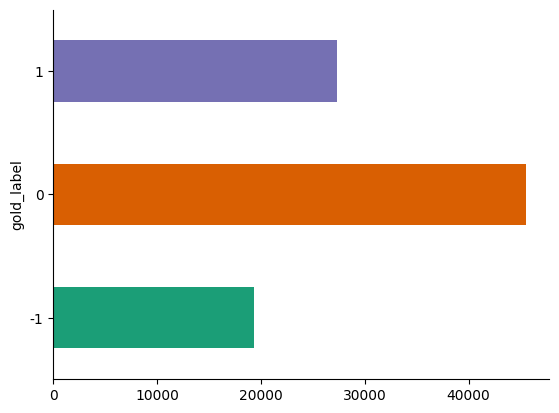

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
train_df.groupby('gold_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
label_counts_sorted = train_df['gold_label'].value_counts().sort_index()

print(label_counts_sorted)


gold_label
-1    19386
0     45489
1     27353
Name: count, dtype: int64


In [ ]:
import math
import nltk

In [ ]:
import re

In [ ]:
def remove_tags(string):
    removelist = ""
    result = re.sub('','',string)          #remove HTML tags
    result = re.sub('https://.*','',result)   #remove URLs
    result = result.lower()
    return result
train_df['sentence']=train_df['sentence'].apply(lambda cw : remove_tags(cw))

In [ ]:
def remove_tags(string):
    removelist = ""
    result = re.sub('','',string)          #remove HTML tags
    result = re.sub('https://.*','',result)   #remove URLs
    result = result.lower()
    return result
test_df['sentence']=test_df['sentence'].apply(lambda cw : remove_tags(cw))

In [ ]:
train_df.head()

text_id                                           sentence gold_label
0  r1-0051002             cheers,\n\ndennis nguyen\n416-879-6431          0
1  r1-0020356               may have to wait longer on holidays.         -1
2  r1-0058348    i drove to vegas may 6th,  to get my hair done.          0
3  r1-0080006  in addition, i eat out often at various restau...          1
4  r1-0000827                  perhaps she was doing us a favor?          0

## Data Preprocessing

This section is left blank but encourages you to do some data analysis on the training, dev and test data (if available). You can gain some interesting insights from the data and it can help in the modelling perspective.

Ideas:
- Label distribution (make a bar chart)
- NER extraction (maybe remove the entities to see if the accuracy is affected)
- Some unreadable characters or special characters (This can be removed as an attempt at data cleaning) (Regex is your best friend here)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
train_df['sentence'] = train_df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
test_df['sentence'] = test_df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
!pip install nltk

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
train_df['sentence'] = train_df.sentence.apply(lemmatize_text)

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
test_df['sentence'] = test_df.sentence.apply(lemmatize_text)

In [ ]:
train_df.head()

text_id                                           sentence gold_label
0  r1-0051002                cheers, dennis nguyen 416-879-6431           0
1  r1-0020356                         may wait longer holidays.          -1
2  r1-0058348                drove vega may 6th, get hair done.           0
3  r1-0080006  addition, eat often various restaurant clevela...          1
4  r1-0000827                                  perhaps u favor?           0

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

train_df['tokenized_sentences'] = train_df['sentence'].apply(lambda x: [token.text for token in nlp(x)])

In [ ]:
test_df['tokenized_sentences'] = test_df['sentence'].apply(lambda x: [token.text for token in nlp(x)])

In [ ]:
all_words = train_df['tokenized_sentences'].tolist()

In [ ]:
print(all_words)

[['cheers', ',', 'dennis', 'nguyen', '416', '-', '879', '-', '6431'], ['may', 'wait', 'longer', 'holidays', '.'], ['drove', 'vega', 'may', '6th', ',', 'get', 'hair', 'done', '.'], ['addition', ',', 'eat', 'often', 'various', 'restaurant', 'cleveland', 'opinion', 'alfresco', 'dining', 'rated', 'true', 'statement', 'sanctuary', 'green', '.'], ['perhaps', 'u', 'favor', '?'], ['checked', 'magic', 'eight', 'ball', 'diamond', "'s", 'future', '.'], ['place', 'dim', 'sum', '7', 'day', 'week', 'make', 'fresh', 'order', ',', 'think', '10', 'day', 'old', 'fresh', '.'], ['take', 'credit', 'card', 'certain', 'amount', '-', 'forget', 'exactly', 'wanna', 'say', '$', '10', '.'], ['pal', 'who', "'s", 'going', 'tell', 'story', 'occasionally', '!'], ['chili', 'item', 'never', 'need', 'shorted', ',', 'always', 'ready', '.'], ['came', 'crooked', ',', 'thick', ',', 'extremely', 'long', ',', 'priced', 'nail', 'fancy', 'nail', 'salon', 'craig', 'rd', '.'], ['complaint', '-', 'tried', 'dress', 'best', 'possibl

In [ ]:
from gensim.models import Word2Vec
word2vec_model = Word2Vec(all_words, vector_size=100, window=5, min_count=1, workers=4)

vocab_size = len(word2vec_model.wv.key_to_index)
print(f'Vocabulary Size: {vocab_size}')


Vocabulary Size: 32004


In [ ]:
vocab = word2vec_model.wv.key_to_index

In [ ]:
if '<unk>' in vocab:
    print("<unk> tag exists in vocab.")
else:
    print("<unk> tag does not exist in vocab.")


<unk> tag does not exist in vocab.


In [ ]:
train_df['sequences'] = train_df['tokenized_sentences'].apply(lambda x: [vocab.get(word)for word in x])  # Use vocab.get to handle unknown words

In [ ]:
test_df['sequences'] = test_df['tokenized_sentences'].apply(lambda x: [vocab.get(word) for word in x])  # Use vocab.get to handle unknown words

In [ ]:
test_df['sequences'] = test_df['sequences'].apply(lambda x: [item for item in x if item is not None])

In [ ]:
train_df['sequences'].head()

0    [4875, 1, 7050, 13360, 16860, 4, 16858, 4, 16857]
1                              [340, 88, 594, 4141, 0]
2             [814, 187, 340, 4308, 1, 9, 180, 121, 0]
3    [1644, 1, 94, 517, 1559, 30, 1352, 977, 11659,...
4                                 [1477, 33, 1379, 18]
Name: sequences, dtype: object

In [ ]:
test_df['sequences'].head()

0    [683, 1485, 3696, 42, 304, 106, 264, 4, 37, 37...
1       [44, 517, 164, 7, 515, 788, 2361, 3664, 18, 7]
2    [731, 15, 3816, 906, 19, 5299, 90, 24, 206, 33...
3                             [1825, 525, 560, 589, 0]
4    [4343, 327, 4, 249, 54, 9, 4579, 1372, 1169, 2...
Name: sequences, dtype: object

In [ ]:
train_df['gold_label'].head()

0     0
1    -1
2     0
3     1
4     0
Name: gold_label, dtype: object

In [ ]:
print(train_df['gold_label'].dtype)

object


In [ ]:
train_df['gold_label'] = pd.to_numeric(train_df['gold_label'], errors='coerce')

In [ ]:
train_df['gold_label'].head()

0    0
1   -1
2    0
3    1
4    0
Name: gold_label, dtype: int64

In [ ]:
def map_labels(label):
    if label == -1:
        return 0
    elif label == 0:
        return 1
    elif label == 1:
        return 2
train_df['labels'] = train_df['gold_label'].apply(map_labels)

In [ ]:
train_df['labels'].head()

0    1
1    0
2    1
3    2
4    1
Name: labels, dtype: int64